# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual



1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [64]:
! git clone https://www.github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/assignment4/data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

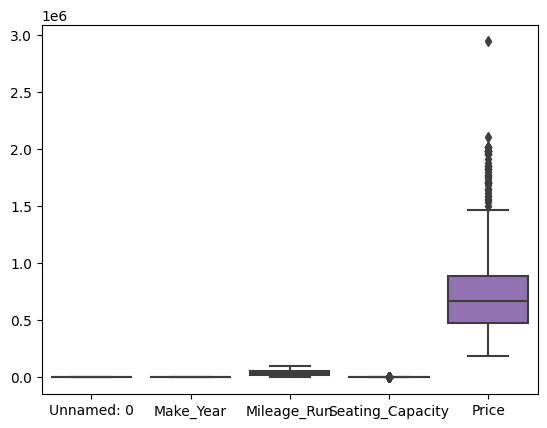

In [66]:
sns.boxplot(data = df)

<Axes: >

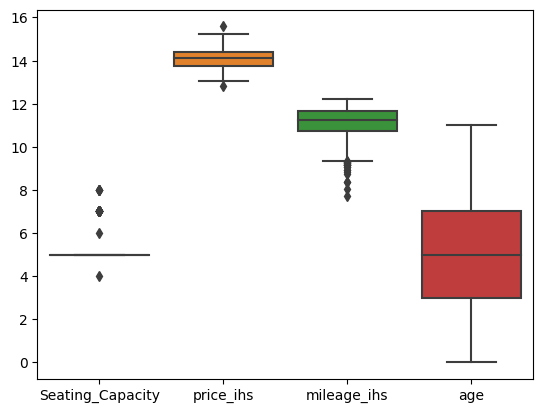

In [67]:
#fix price and mileage
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year']) - df['Make_Year']
df_test = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
sns.boxplot(data = df_test)

2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

<Axes: xlabel='price_ihs', ylabel='Density'>

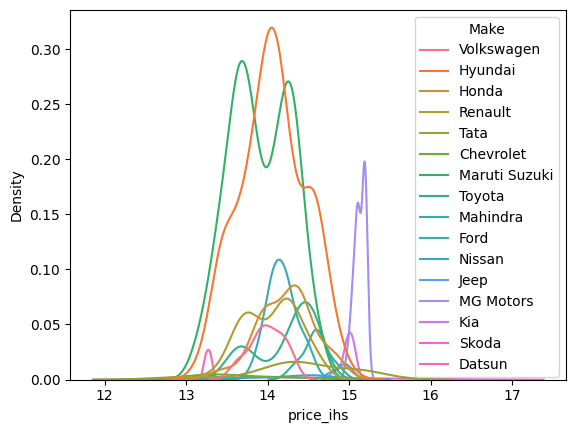

In [68]:
df['price_ihs'].groupby(df['Make']).describe()
sns.kdeplot(data=df,x='price_ihs',hue='Make')

MG Motors cars are the most expensive. In general, the prices for all manufactures has a bell-curve shaped price with a single peak in the middle except for Toyota and Maruti Suzuki.

3. Split the data into an 80% training set and a 20% testing set.

In [69]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

In [70]:
###question: this didn't work compare to the code in the answer why?

#from sklearn.model_selection import train_test_split

#y = df['price_ihs']
#X = df.drop(['Price', 'Mileage_Run','Make_Year','Unnamed: 0'], axis = 1)
#df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(df_train)

4. Let's focus on linear models.

* Make a model where you
regress price on the numeric variables alone; what is the
 and RMSE on the test set?

* Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the
 and RMSE on the test set?

* Which model performs better on the test set?

* Make a third model that combines all the regressors from the previous two; what is the
 and RMSE on the test set?

* Does the joint model perform better or worse, and by home much?

In [71]:
print(df.dtypes)

Unnamed: 0             int64
Make                  object
Make_Year              int64
Color                 object
Body_Type             object
Mileage_Run            int64
No_of_Owners          object
Seating_Capacity       int64
Fuel_Type             object
Transmission          object
Transmission_Type     object
Price                  int64
price_ihs            float64
mileage_ihs          float64
age                    int64
dtype: object


In [72]:
from sklearn import linear_model

#regress price on numeric variables alone
var_num = ['age','mileage_ihs','Seating_Capacity']
X_train_num = df_train.loc[:,var_num]
reg_num = linear_model.LinearRegression().fit(X_train_num,y_train)

X_test_num = df_test.loc[:, var_num]
y_hat = reg_num.predict(X_test_num)

print('Numerics only R-squared: ', reg_num.score(X_test_num,y_test))
rmse_num = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numerics only RMSE: ', rmse_num)

Numerics only R-squared:  0.45254262356326824
Numerics only RMSE:  0.33392654735906463


In [73]:
#regress price on categorical variables
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
X_train_c = df_train.loc[:,var_cat]
X_test_c = df_test.loc[:, var_cat]

dummies = pd.DataFrame([]) #referenced the answer key for this portion
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c, y_train)
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only R-squared: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

Categorical only R-squared:  0.6298129532407463
Categorical only RMSE:  0.2745910642522728


In [74]:
# Combine numeric _n and categorical _c variables:
X_train_all = pd.concat([X_train_num, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_num, X_test_c],axis=1, ignore_index=True)
X_train_all.fillna(0, inplace=True)

#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(X_test_all)
print('All R-squared: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) # R2

All R-squared:  0.7999206763763924
All RMSE:  0.201872376861989


Between the numerical and categorical models the numerical one performed better. The joint model performed better than the two individual models. The joint model has a R-squared of 0.800 and a RMSE of 0.202 while the numerical model has a R-squared of 0.400 and RMSE of 0.338 and the categorical model has a R-squared of -0.111 and a RMSE of 0.460.

5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the
 and RMSE change? At what point does
 go negative on the test set? For your best model with expanded features, what is the
 and RMSE? How does it compare to your best model from part 3?

In [75]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,7):
    poly = PolynomialFeatures(degree=d,include_bias=False)
    Z = poly.fit_transform(X_test_num)
    names = poly.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = poly.fit_transform(X_train_num)
    names = poly.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)
    #
    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # R2

1  Rsq:  0.7999206763763924
1 RMSE:  0.201872376861989
2  Rsq:  0.8025408094604642
2 RMSE:  0.2005462138908575
3  Rsq:  0.7996599800454574
3 RMSE:  0.2020038503577555
4  Rsq:  -5136369668.87971
4 RMSE:  32344.759597236964
5  Rsq:  -510853755.57051307
5 RMSE:  10200.561693879845
6  Rsq:  -68984.29695598874
6 RMSE:  118.5370350898972


**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work



 1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.

In [76]:
df = pd.read_csv('/content/assignment4/data/wages_hw.csv')
df.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
2,3,4.8,501 to 1000 employees,Business Services,85.0,FL
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY


In [77]:
df = df.drop('Unnamed: 0', axis = 1)

In [78]:
print(df.dtypes)

Rating        float64
Size           object
Sector         object
avg_salary    float64
job_state      object
dtype: object


In [79]:
if df.isna().any().any(): #decided to try a new way with the help of ChatGPT
    print("There are NaN values in the DataFrame.")
    print("Columns with NaN values:")
    print(df.columns[df.isna().any()])

    print("\nNumber of NaN values in each column:")
    print(df.isna().sum())
else:
    print("There are no NaN values in the DataFrame.")

    #probably gonna keep this chunk of code for future usage it's very useful

There are no NaN values in the DataFrame.


In [80]:
for columns in df.columns:
  print(columns, '\n')
  print(df[columns].unique(),'\n','\n')

Rating 

[3.8 3.4 4.8 2.9 4.1 3.3 4.6 3.5 3.2 3.7 3.6 3.9 4.3 4.2 4.  4.7 5.  3.1
 4.4 2.8 2.7 1.9 4.5 3.  2.3 2.6 2.4 2.5 2.2 2.1] 
 

Size 

['501 to 1000 employees' '10000+ employees' '1001 to 5000 employees'
 '51 to 200 employees' '201 to 500 employees' '5001 to 10000 employees'
 '1 to 50 employees' 'Unknown'] 
 

Sector 

['Aerospace & Defense' 'Health Care' 'Business Services'
 'Oil, Gas, Energy & Utilities' 'Real Estate' 'Finance'
 'Information Technology' 'Retail' 'Biotech & Pharmaceuticals' 'Media'
 'Insurance' 'Transportation & Logistics' 'Telecommunications' '-1'
 'Manufacturing' 'Mining & Metals' 'Government' 'Education'
 'Agriculture & Forestry' 'Travel & Tourism' 'Non-Profit'
 'Arts, Entertainment & Recreation' 'Construction, Repair & Maintenance'
 'Accounting & Legal' 'Consumer Services'] 
 

avg_salary 

[ 72.   87.5  85.   76.5 114.5  95.   73.5 114.   61.  140.  163.5 139.
  65.5 113.5 146.  102.  153.5 142.5 105.5  96.  112.5  84.  143.   86.5
  99.5  47.5 121.  106.

<Axes: >

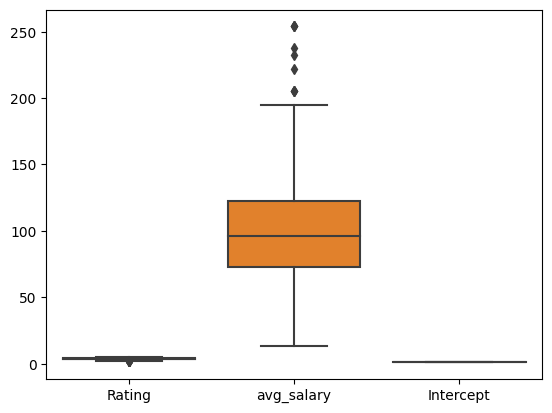

In [81]:
df['Sector'] = df['Sector'].str.replace('-1','Missing')
df['Intercept'] = np.ones(df.shape[0])
sns.boxplot(data = df)

In [82]:
df.describe()

,Rating,avg_salary,Intercept
count,731.000000,731.000000,731.0
mean,3.688372,100.090971,1.0
std,0.570353,38.537585,0.0
min,1.900000,13.500000,1.0
25%,3.300000,73.000000,1.0
50%,3.700000,96.500000,1.0
75%,4.000000,122.500000,1.0
max,5.000000,254.000000,1.0


In [83]:
np.random.seed(1000)

N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['avg_salary']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

2. Use a linear model to regress avg_salary on Sector. Which sectors have the highest predicted wages? What is the
 and RMSE on the test set?

In [84]:
from sklearn import linear_model

dummies = pd.get_dummies(df.loc[:, 'Sector'], dtype = int)
X_train = dummies.iloc[train_rows, :]
X_test = dummies.iloc[test_rows, :]
regression = linear_model.LinearRegression(fit_intercept=False).fit(X_train, y_train)
rdf = pd.DataFrame({'variable': regression.feature_names_in_, 'slope':regression.coef_})
rdf.sort_values(by='slope',axis=0)

,variable,slope
6,"Construction, Repair & Maintenance",26.500000
3,"Arts, Entertainment & Recreation",48.500000
11,Health Care,68.837500
24,Travel & Tourism,70.142857
19,"Oil, Gas, Energy & Utilities",78.181818
18,Non-Profit,79.700000
2,Agriculture & Forestry,80.500000
14,Manufacturing,80.537037
10,Government,86.055556
5,Business Services,96.239726


The sectors that have the highest predicted wages are Media, Accounting and Legal, Information Technology, Biotech & Pharmaceuticals

In [85]:
y_hat = regression.predict(X_test)
print('Rsq: ', regression.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)

Rsq:  0.10786156021224103
RMSE:  31.81255349338017


3. Make a scatterplot of avg_salary and Rating. Is there an obvious visual relationship between the two variables? Regress avg_salary on Rating as a numeric variable: Do higher ratings predict higher or lower wages? Convert Rating to a one-hot encoded variable, with a category for each rating. Run a regression of avg_salary on the categorical version. How do your results change? Explain. Which version has a higher
 and lower RMSE?

<Axes: xlabel='Rating', ylabel='avg_salary'>

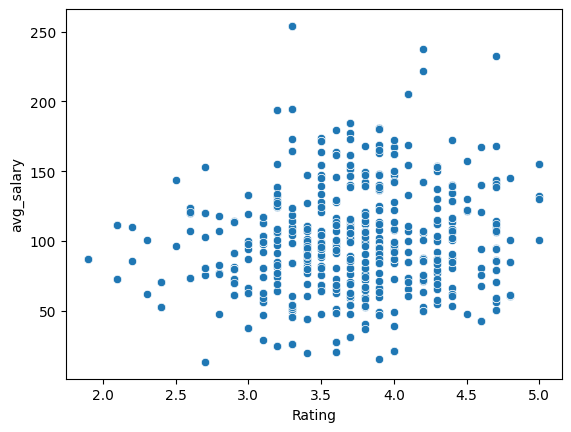

In [86]:
sns.scatterplot(data=df,x='Rating',y='avg_salary')

There is no visual relationship between the two variables.

In [87]:
X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

reg = linear_model.LinearRegression(fit_intercept = False).fit(X_train, y_train)
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse, '\n')

print('Coefficient for Intercept:', reg.coef_[0])
print('Coefficient for Rating:', reg.coef_[1])

Rsq:  0.0012158997447975217
RMSE:  33.660317944994524 

Coefficient for Intercept: 65.85129074015462
Coefficient for Rating: 9.46162749722274


Higher ratings does predict a higher wage

In [88]:
#one-hot encoded with cat for each rating
df['Rating_rnd'] = df['Rating'].round()

X_train = df.loc[train_rows,['Rating_rnd']]
dummies_train = pd.get_dummies(X_train['Rating_rnd'],dtype=int)
X_test = df.loc[test_rows,['Rating_rnd']]
dummies_test = pd.get_dummies(X_test['Rating_rnd'],dtype=int)

reg = linear_model.LinearRegression(fit_intercept = False).fit(dummies_train, y_train)
y_hat = reg.predict(dummies_test)

print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

n=0

for columns in dummies_train.columns:
  print('variable:',columns, ' ', 'slope:', ' ', reg.coef_[n])
  n = n + 1

Rsq:  -0.003408188834975734
RMSE:  33.73814685499916
variable: 2.0   slope:   81.73529411764704
variable: 3.0   slope:   95.05487804878048
variable: 4.0   slope:   104.22752808988774
variable: 5.0   slope:   102.45744680851065


The result with the categorical variable end up with a rsq of less than 0 which is not ideal. The explanation for that is because when converting the dummy variables the fractions are not allowed since they're all now categorical variables. So this makes the model less accurate.

4. Now interact Sector with the categorical version of Rating, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the .PolynomialFeatures() function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts Sector and Rating and then one-hot encoding the result. Regress avg_salary on the (Sector, Rating) pairs. How does the
and RMSE on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?

In [110]:
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int )

dummies_train = dummies.iloc[train_rows,:]
dummies_test = dummies.iloc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train)

y_hat = reg.predict(dummies_test)
print('Rsq: ', reg.score(dummies_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

Rsq:  0.23491600794936895
RMSE:  29.46028618802498


5. Run a linear regression of avg_salary on all the variables. What is the
 on the test set? How does it compare to your simpler models in 2--4?

In [89]:
state_dummies = pd.get_dummies(df['job_state'],dtype=int)
size_dummies = pd.get_dummies(df['Size'],dtype=int)
sector_dummies = pd.get_dummies(df['Sector'],dtype=int)

X_temp = df.loc[:, ['Intercept', 'Rating_rnd']]
X = pd.concat([X_temp, state_dummies, size_dummies, sector_dummies], axis = 1)

#split 20, 80 train & test
X_train = X.iloc[train_rows,:]
X_test = X.loc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

print('Rsq: ', reg.score(X_test,y_test))
y_hat = reg.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

Rsq:  -1.2442154846884264e+19
RMSE:  118803765200.25655


The Rsq is -1.244 which is way worse than the models from 1-4

6. Build a decision tree by regressing avg_salary on Sector, Rating, and the (Sector, Rating) pairs. What are the
 and RMSE of your models on the test set? How do your answers compare to parts 2, 3, and 4?

In [104]:
from sklearn import tree

#regress avg salary on sector
dummies = pd.get_dummies(df.loc[:, 'Sector'], dtype = int)
X_train = dummies.iloc[train_rows, :]
X_test = dummies.iloc[test_rows, :]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train)
y_hat = cart.predict(X_test)

rsq = cart.score(X_test,y_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Regress Avg Salary on Sector\n','Rsq: ', rsq,'RMSE: ', rmse, '\n')


#regress avg salary on Rating
X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train)
y_hat = cart.predict(X_test)

rsq = cart.score(X_test,y_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Regress Avg Salary on Rating\n','Rsq: ', rsq,'RMSE: ', rmse, '\n')


#regress rating and sector as a pair
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int )
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train)
y_hat = cart.predict(X_test)

rsq = cart.score(X_test,y_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Regress Avg Salary on the Pair\n','Rsq: ', rsq,'RMSE: ', rmse, '\n')

Regress Avg Salary on Sector
 Rsq:  0.1078615602122408 RMSE:  31.812553493380175 

Regress Avg Salary on Rating
 Rsq:  -0.0038736868222599696 RMSE:  33.74597179533482 

Regress Avg Salary on the Pair
 Rsq:  0.23491600794936895 RMSE:  29.46028618802498 



7. Build a decision tree by regressing avg_salary on all the other variables. What is the

In [109]:
#CatVar
state_dummies = pd.get_dummies(df['job_state'], dtype = int)
size_dummies = pd.get_dummies(df['Size'], dtype = int)
sector_dummies = pd.get_dummies(df['Sector'], dtype = int)

#NumVar
X_num = df.loc[:, ['Intercept', 'Rating_rnd']]
X = pd.concat([X_num, state_dummies, size_dummies, sector_dummies], axis = 1)

#80&20 train and test
X_train = X.iloc[train_rows, :]
X_test = X.iloc[test_rows, :]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train)

y_hat = cart.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
rsq = cart.score(X_test,y_test)

print('Regress Avg Salary on All the Other Variables\n','Rsq: ', rsq,'RMSE: ', rmse, '\n')

Regress Avg Salary on All the Other Variables
 Rsq:  0.32624475488316607 RMSE:  27.64607509542367 

